In [1]:
pwd

'C:\\Users\\Mohamed Asfar\\Machine Learning A-Z (Codes and Datasets)'

# Importing libraries

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

# Importing the dataset

In [3]:
dataset = pd.read_csv('BankChurners.csv')


# Cleaning the data

In [4]:
dataset

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Unnamed: 21
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,NaN
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,NaN
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,NaN
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,NaN
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,NaN
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,NaN
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,NaN
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,NaN


In [5]:
dataset=dataset.drop(["Unnamed: 21"], axis=1)


# Checking for missing values and duplicates

In [6]:
dataset.duplicated().sum()
#No Duplicates

0

In [7]:
dataset.isnull().values
#No null/missing values

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [8]:
dataset

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

# Exploratory Data Analysis

In [10]:
dataset.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [11]:
# Identifying Numerical and categorical data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [12]:
numerical_cols=['CLIENTNUM','Customer_Age','Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
               'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
               'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

In [13]:
categorical_cols= ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

# Visualization

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

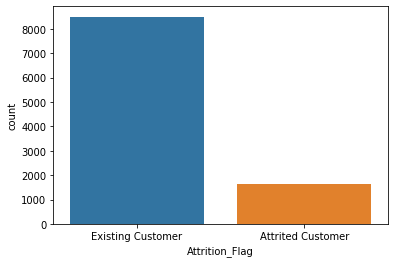

In [15]:
sns.countplot(x='Attrition_Flag',data=dataset)
#Target y variable

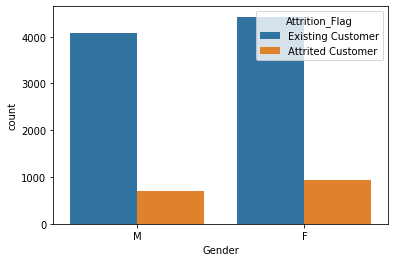

In [16]:
sns.countplot(x='Gender',data=dataset, hue='Attrition_Flag')

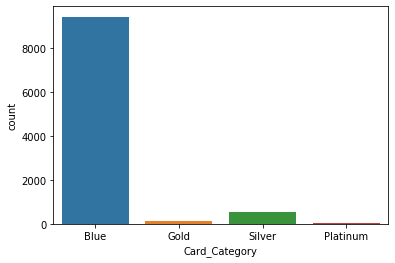

In [17]:
sns.countplot(x='Card_Category',data=dataset)

Text(0, 0.5, 'Range')

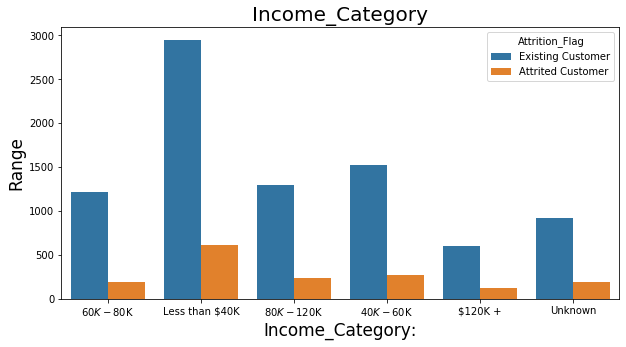

In [18]:
plt.figure(figsize = (10,5))
ax=sns.countplot(x = "Income_Category", data = dataset, hue='Attrition_Flag')
ax.set_title("Income_Category", fontsize = 20)
plt.xlabel("Income_Category:",fontsize=17)
plt.ylabel("Range", fontsize=17)

Text(0, 0.5, 'count')

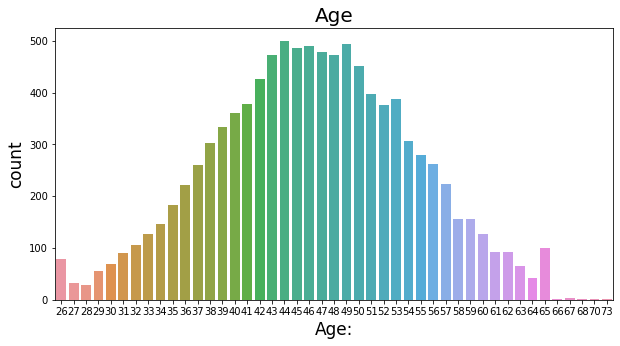

In [19]:
plt.figure(figsize = (10,5))
ax=sns.countplot(x = "Customer_Age", data = dataset)
ax.set_title("Age", fontsize = 20)
plt.xlabel("Age:",fontsize=17)
plt.ylabel("count", fontsize=17)
#Age is normally distributed

Text(0, 0.5, 'count')

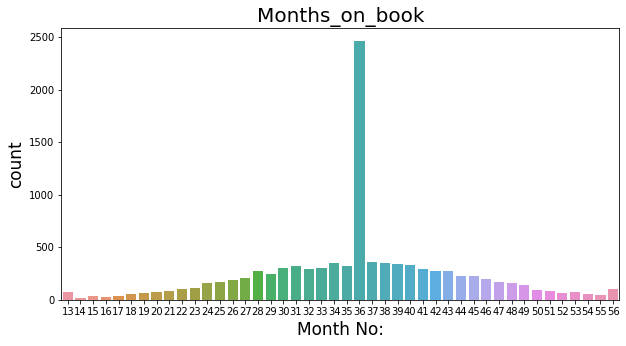

In [20]:
plt.figure(figsize = (10,5))
ax=sns.countplot(x = "Months_on_book", data = dataset)
ax.set_title("Months_on_book", fontsize = 20)
plt.xlabel("Month No:",fontsize=17)
plt.ylabel("count", fontsize=17)
#36th month has more customers

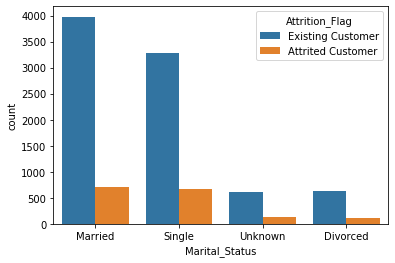

In [21]:
sns.countplot(x='Marital_Status',data=dataset, hue='Attrition_Flag')

Text(0, 0.5, 'count')

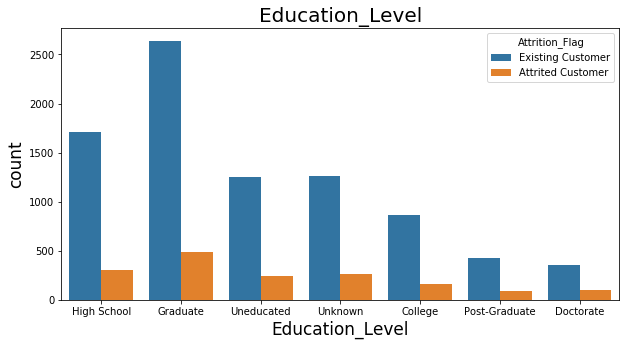

In [22]:
plt.figure(figsize = (10,5))
ax=sns.countplot(x = 'Education_Level', data = dataset, hue='Attrition_Flag')
ax.set_title('Education_Level', fontsize = 20)
plt.xlabel('Education_Level',fontsize=17)
plt.ylabel("count", fontsize=17)
#36th month has more customers

#sns.countplot(x='Education_Level',data=dataset, hue='Attrition_Flag' )

# Feature Engineering

In [23]:
#Converting categorical variables into Numericals

In [24]:
dataset['Education_Level'] = dataset['Education_Level'].replace({'Unknown' : 0, 
                                    'Uneducated': 1, 
                                    'High School' : 2, 
                                    'College' : 3, 
                                    'Graduate' : 4, 
                                    'Post-Graduate': 5, 
                                    'Doctorate' : 6})

In [25]:
dataset["Marital_Status"] = dataset["Marital_Status"].replace({"Married" : 0, 
                                                        "Single" : 1,
                                                        "Unknown":2,
                                                        "Divorced" : 3})

In [26]:
dataset["Income_Category"]= dataset["Income_Category"].replace({'Unknown': 0,
                                                                 'Less than $40K' : 1,
                                                                 '$40K - $60K'    : 2,
                                                                 '$80K - $120K':  3,
                                                                 '$60K - $80K': 4,
                                                                 '$120K +': 5})

In [27]:
dataset["Gender"]=dataset["Gender"].replace({'M' :1,'F':2})

In [28]:
dataset["Attrition_Flag"]=dataset["Attrition_Flag"].replace({'Existing Customer' :0,'Attrited Customer':1})

In [29]:
dataset["Card_Category"]=dataset["Card_Category"].replace({'Blue' :1,'Gold':2, 'Silver':3, 'Platinum':4})

In [30]:
dataset=dataset[['CLIENTNUM',
               'Customer_Age',
               'Gender',
               'Dependent_count',
               'Education_Level',
               'Marital_Status',
               'Income_Category',
               'Card_Category',
               'Months_on_book',
               'Total_Relationship_Count',
               'Months_Inactive_12_mon',
               'Contacts_Count_12_mon',
               'Credit_Limit',
               'Total_Revolving_Bal',
               'Avg_Open_To_Buy',
               'Total_Amt_Chng_Q4_Q1',
               'Total_Trans_Amt',
               'Total_Trans_Ct',
               'Total_Ct_Chng_Q4_Q1',
               'Avg_Utilization_Ratio',
               'Attrition_Flag']]

In [31]:
dataset

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
0,768805383,45,1,3,2,0,4,1,39,5,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0
1,818770008,49,2,5,4,1,1,1,44,6,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0
2,713982108,51,1,3,4,0,3,1,36,4,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0
3,769911858,40,2,4,2,2,1,1,34,3,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0
4,709106358,40,1,3,1,0,4,1,21,5,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,1,2,4,1,2,1,40,3,...,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0
10123,710638233,41,1,2,0,3,2,1,25,4,...,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,1
10124,716506083,44,2,1,2,0,1,1,36,5,...,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,1
10125,717406983,30,1,2,4,2,2,1,36,4,...,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,1


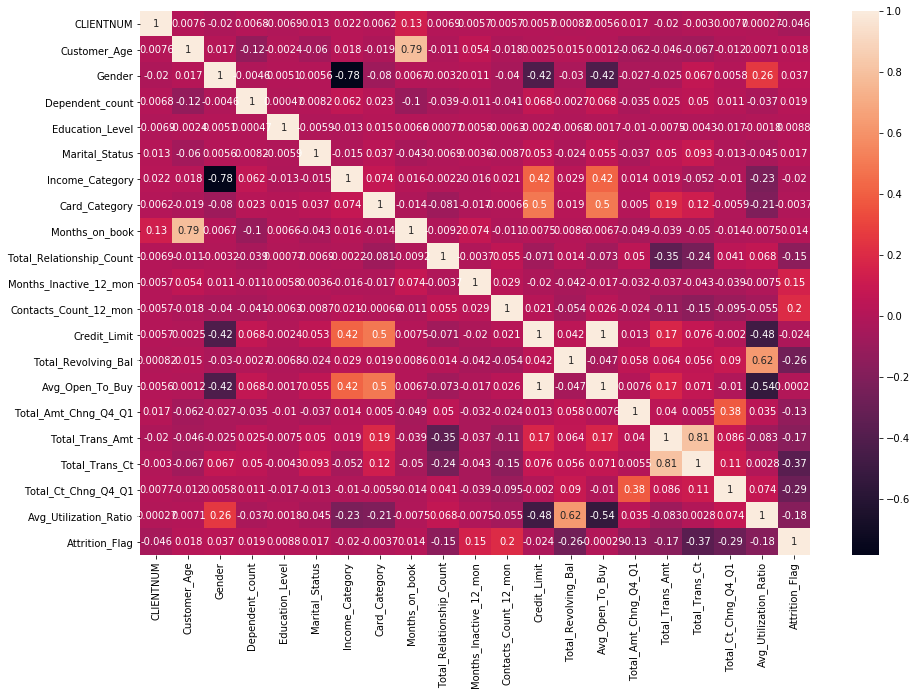

In [32]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
df = pd.DataFrame(data=dataset)
corrMatrix = df.corr()
plt.figure(figsize=(15,10))
sn.heatmap(corrMatrix, annot=True)
#plt.show()
#plt.figure(figsize=(20,8))

In [33]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

# Creating Training and Test sets

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [35]:
print(X_train)

[[5.50e+01 1.00e+00 2.00e+00 ... 3.40e+01 1.00e+00 1.41e-01]
 [3.20e+01 1.00e+00 0.00e+00 ... 6.80e+01 4.78e-01 0.00e+00]
 [3.50e+01 2.00e+00 4.00e+00 ... 8.00e+01 7.02e-01 1.74e-01]
 ...
 [6.00e+01 1.00e+00 1.00e+00 ... 6.70e+01 9.14e-01 1.67e-01]
 [5.10e+01 1.00e+00 3.00e+00 ... 1.19e+02 7.76e-01 4.30e-02]
 [5.30e+01 2.00e+00 1.00e+00 ... 3.70e+01 6.82e-01 8.13e-01]]


# Feature Scaling

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Creating Models 

# 1. Artificial Neural Network

In [37]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))



In [38]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [39]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [40]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [41]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
254/254 [==============================] - 1s 898us/step - loss: 0.7011 - accuracy: 0.5683
Epoch 2/100
254/254 [==============================] - 0s 806us/step - loss: 0.3946 - accuracy: 0.8372
Epoch 3/100
254/254 [==============================] - 0s 818us/step - loss: 0.3129 - accuracy: 0.8743
Epoch 4/100
254/254 [==============================] - 0s 836us/step - loss: 0.2797 - accuracy: 0.8864
Epoch 5/100
254/254 [==============================] - 0s 865us/step - loss: 0.2601 - accuracy: 0.8979
Epoch 6/100
254/254 [==============================] - 0s 797us/step - loss: 0.2496 - accuracy: 0.9016
Epoch 7/100
254/254 [==============================] - 0s 809us/step - loss: 0.2211 - accuracy: 0.9140
Epoch 8/100
254/254 [==============================] - 0s 822us/step - loss: 0.2160 - accuracy: 0.9150
Epoch 9/100
254/254 [==============================] - 0s 828us/step - loss: 0.2183 - accuracy: 0.9148
Epoch 10/100
254/254 [==============================] - 0s 798us/step - l

In [42]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [0 1]
 [0 0]
 [0 0]]


In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1652   65]
 [  72  237]]


0.9323790720631787

In [44]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred, average='binary')

0.7847682119205298

In [45]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='binary')

0.7669902912621359

# 2 Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [47]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [1 1]
 [0 0]
 [0 0]]


In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1693   24]
 [  79  230]]


0.9491609081934848

In [49]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred, average='binary')

0.905511811023622

In [50]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='binary')

0.7443365695792881

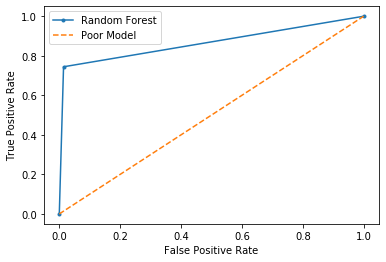

In [52]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot
roc_curve(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred)
pyplot.plot(fpr, tpr, marker='.', label='Random Forest')
# plot no skill roc curve
pyplot.plot([0, 1], [0, 1], linestyle='--', label='Poor Model')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

# 3 Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state = 0)
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
y_pred = clf.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [0 1]
 [0 0]
 [0 0]]


In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1653   64]
 [ 126  183]]


0.9062191510365252

In [56]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred, average='binary')

0.7408906882591093

In [57]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='binary')

0.5922330097087378

# 4 Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier
clfdt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
clfdt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [59]:
y_pred = clfdt.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [1 1]
 [0 0]
 [0 0]]


In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1663   54]
 [  64  245]]


0.9417571569595261

In [61]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred, average='binary')

0.8193979933110368

In [62]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='binary')

0.7928802588996764